# Maunally Computing....
> Maunally computing, the Boomer way - if boomers coded in 🅱ython

Adapted from [harsh14796's project](https://github.com/harsh14796/Stock-Market-Analysis-With-Python) amoung other sources


In [1]:
from utils import get_data, normalize_data, zero_shift, daily_returns, daily_change, daily_change

import numpy as np
import pandas as pd

# !pip install yfinance networkx
import yfinance as yf

# multiple outputs per cells. does not mix well with plt as they return stull that will be printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

# defaults for plt
%matplotlib inline
plt.style.use('fivethirtyeight')                # first, small enchancements, xlabels, ylabels, legand sizing...   
plt.rcParams['lines.linewidth'] = 2             # Change linewidth of plots
plt.rcParams['figure.figsize'] = (12, 8)        # Change the size of plots
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

In [2]:
tickers = ['SPY', 'QQQ', 'XIU.TO', 'AAPL', 'AMZN']
df = get_data(tickers, end=end, drop_na=True)

df.head(3)
df.tail(3)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
shape of the dataframe: (8270, 5)
shape of the dataframe - after droping NA: (5576, 5)


,AMZN,XIU.TO,AAPL,SPY,QQQ
Date,,,,,
1999-10-04,77.0625,6.185673,0.492876,86.591560,53.259003
1999-10-05,78.4375,6.141118,0.518641,86.508812,53.637486
1999-10-06,82.4375,6.178246,0.512915,87.833351,54.712120


,AMZN,XIU.TO,AAPL,SPY,QQQ
Date,,,,,
2022-05-18,2142.250000,30.879999,140.820007,391.859985,291.140015
2022-05-19,2146.379883,30.950001,137.350006,389.459991,289.579987
2022-05-20,2151.820068,31.010000,137.589996,389.630005,288.679993


Normalizing data... `(data - data.min()) / (data.max() - data.min())`
Ensure each column starts at 0 `data-data.iloc[0]`


<AxesSubplot:xlabel='Date'>

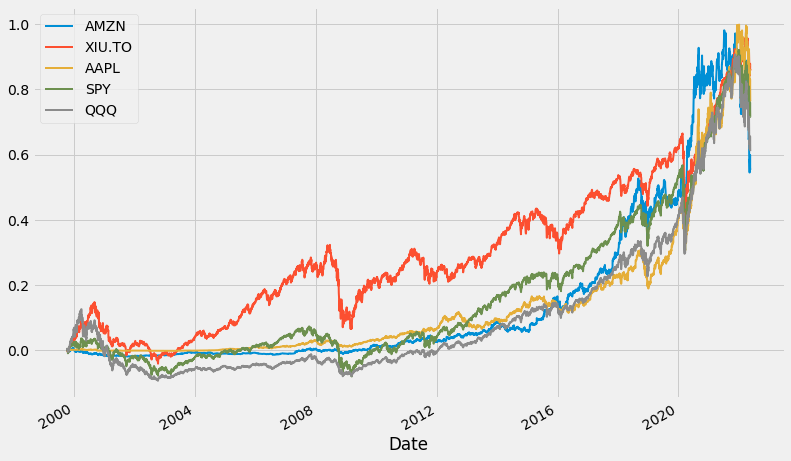

In [3]:
df = normalize_data(df)
df = zero_shift(df)
df.plot() # linewidth=2

In [4]:
print(f'Standard Deviation')
pd.DataFrame(df.std(), columns=['STD']).T

print(f'Covariance')
df.cov()

print(f"Pearson's Correlation")
df.corr()

print(f"Spearman's Correlation")
from scipy.stats import spearmanr
pd.DataFrame(spearmanr(df)[0], columns=df.columns, index=df.columns)

Standard Deviation


,AMZN,XIU.TO,AAPL,SPY,QQQ
STD,0.257936,0.226099,0.215988,0.234102,0.226338


Covariance


,AMZN,XIU.TO,AAPL,SPY,QQQ
AMZN,0.066531,0.051764,0.053606,0.058236,0.057146
XIU.TO,0.051764,0.051121,0.043589,0.050676,0.046752
AAPL,0.053606,0.043589,0.046651,0.048397,0.047777
SPY,0.058236,0.050676,0.048397,0.054804,0.052159
QQQ,0.057146,0.046752,0.047777,0.052159,0.051229


Pearson's Correlation


,AMZN,XIU.TO,AAPL,SPY,QQQ
AMZN,1.000000,0.887592,0.962220,0.964431,0.978852
XIU.TO,0.887592,1.000000,0.892575,0.957410,0.913583
AAPL,0.962220,0.892575,1.000000,0.957155,0.977311
SPY,0.964431,0.957410,0.957155,1.000000,0.984391
QQQ,0.978852,0.913583,0.977311,0.984391,1.000000


Spearman's Correlation


,AMZN,XIU.TO,AAPL,SPY,QQQ
AMZN,1.000000,0.948457,0.972080,0.916620,0.907924
XIU.TO,0.948457,1.000000,0.975366,0.961693,0.910336
AAPL,0.972080,0.975366,1.000000,0.937966,0.901455
SPY,0.916620,0.961693,0.937966,1.000000,0.960975
QQQ,0.907924,0.910336,0.901455,0.960975,1.000000


In [5]:
df_daily_returns = daily_change(df)
df_daily_returns.head(3)

,AMZN,XIU.TO,AAPL,SPY,QQQ
Date,,,,,
1999-10-06,2.909091,-0.833305,-0.222253,-16.006823,2.839322
1999-10-07,0.906977,-4.998909,-0.309506,-0.400027,-0.088374
1999-10-08,0.189024,1.500153,-0.448313,1.777828,0.433664


## Simple Uniform allocation

In [6]:
annual_returns = (((df_daily_returns.mean()+1)**250)-1)
weights_uniform = np.array([0.20, 0.20, 0.20, 0.20, 0.20])
pfolio_uniform = np.dot(annual_returns, weights_uniform)
print(f"Annual Return: {pfolio_uniform*100:.2f}%")

Annual Return: 12350.96%


In [7]:
weights_1 = np.array([0.4, 0.05, 0.20, 0.05, 0.3])
pfolio_1 = np.dot(annual_returns, weights_1)
print(f"Annual Return: {pfolio_1*100:.2f}%")

Annual Return: 18574.77%


## Portfolio Variance
> probably wrong... 

* [source](https://github.com/harsh14796/Stock-Market-Analysis-With-Python/blob/master/Div_non-div_risk.ipynb)
* [math background](https://www.northerntrust.com/documents/white-papers/asset-management/minimum-variance-portfolios.pdf?bc=23500800)



In [8]:
# might need to be `log(df_daily_returns)`
pfolio_var = np.dot(weights_uniform.T, np.dot(df_daily_returns.cov() * 250, weights_uniform)) # weights.T @ (df_daily_returns.cov() * 250) @ weights
print(f"Portfolio Variance: {pfolio_var*100:.2f}%")

Portfolio Variance: 99522.53%


In [9]:
# Diversifiable risk
variance_vector = df_daily_returns.var(ddof=1).to_numpy() # np.diag(df_daily_returns.cov())
non_diversifiable_risk = np.dot(weights_uniform**2, variance_vector.T) # np.sum([variance_vector[i] * weights[i] ** 2 for i in range(len(weights))])

# Expected portfolio Volatility (std) = SQRT (WT * (Covariance Matrix) * W)
portfolio_variance = weights_uniform@df_daily_returns.cov()@weights_uniform # same as non_diversifiable_risk
portfolio_voltilt = np.sqrt(weights_uniform@df_daily_returns.cov()@weights_uniform)

print(f"Portfolio Standard Deviation: {portfolio_voltilt*100:.2f}%")
print(f"Diversifiable risk (Variance): {pfolio_var-non_diversifiable_risk*100:.2f}%")
print(f"Non diversifiable risk:        {non_diversifiable_risk*100:.2f}%")

Portfolio Standard Deviation: 199.52%
Diversifiable risk (Variance): 597.16%
Non diversifiable risk:        398.07%


## Beta

In [10]:
# Variance with SPY
print('Variance with SPY')
var = df_daily_returns.cov()*200 # not sure if `*200` is correct
var = var['SPY']
var.to_frame()

# Betas of all stocks. cov_with_market / var(spy)
print('Betas')
(var/var['SPY']).to_frame() 

Variance with SPY


,SPY
AMZN,-3.243228
XIU.TO,1.820972
AAPL,0.400605
SPY,373.669677
QQQ,0.592438


Betas


,SPY
AMZN,-0.008679
XIU.TO,0.004873
AAPL,0.001072
SPY,1.000000
QQQ,0.001585


In [11]:
# Beta from normalized prices (not daily returns)
print('Variance with SPY')
var = df.cov()*200
var = var['SPY']
var.to_frame()

# Betas of all stocks. cov_with_market / var(spy)
print('Betas')
betas = var/var['SPY']
betas.to_frame() 

Variance with SPY


,SPY
AMZN,11.647122
XIU.TO,10.135198
AAPL,9.679379
SPY,10.960758
QQQ,10.431820


Betas


,SPY
AMZN,1.062620
XIU.TO,0.924680
AAPL,0.883094
SPY,1.000000
QQQ,0.951743


In [12]:
# Beta (5Y Daily) from normalized prices (not daily returns)

# var = df.resample('M').mean().last("5Y").cov()*200
var = df.last("5Y").cov()*200
var = var['SPY']
betas = var/var['SPY']
betas.to_frame() 

,SPY
AMZN,1.025984
XIU.TO,0.808969
AAPL,1.420180
SPY,1.000000
QQQ,1.173603


## Common Ratios

In [13]:
#Risk free return
RFR = 0.00 #0.02/250 # or 2/100? 

In [14]:
# Sharpe Ratio
df_recent = df.resample('M').mean().last("5Y")
df_recent = daily_change(df_recent)
sharpe_ratio = ((df_recent.mean()-RFR)/df_recent.std()) * np.sqrt(250)

print(f'Sharpe Ratio:')
sharpe_ratio.to_frame('Sharpe Ratio')

Sharpe Ratio:


,Sharpe Ratio
AMZN,2.883062
XIU.TO,3.341112
AAPL,5.743334
SPY,3.733701
QQQ,4.499077


In [15]:
# Sortino Ratio
TARGET_RETURN = 0.00
temp = np.minimum(0, df_recent - TARGET_RETURN)**2
downside_dev = np.sqrt(np.mean(temp))

sortino_ratio = np.mean(df_recent - TARGET_RETURN) / downside_dev

print(f'Sortino Ratio:')
sortino_ratio.to_frame("Sortino Ratio")

Sortino Ratio:


,Sortino Ratio
AMZN,0.278745
XIU.TO,0.264879
AAPL,0.680575
SPY,0.315527
QQQ,0.441137


## Minimum Variance Portfolio

In [16]:
assert pd.DataFrame(np.linalg.inv(df.cov()) @ df.cov()).round(4).sum().all() == 1
# hence a real? inverse of the covariance matrix exists and we dont have to have faith in pinv working

inv = np.linalg.inv(df.cov())
ones = np.ones(inv.shape[0])
weights = (inv @ ones) / (ones @ inv @ ones) 

print(f'Weights: {weights}, which sum to {weights.sum():.2f}')

pfolio = np.dot(annual_returns, weights)
print(f"Annual Return: {pfolio*100:.2f}%")
print(f"Annual Return of uniform weighting: {pfolio_uniform*100:.2f}%")

Weights: [-1.32306921  1.01412184  1.04138119 -2.00183839  2.26940457], which sum to 1.00
Annual Return: 141160.58%
Annual Return of uniform weighting: 12350.96%


## Markowitz Portfolio
> Certainly Wrong

In [17]:
annual_returns = df_daily_returns.mean() + 1
annual_returns = annual_returns**250 - 1

# Annual Return
pd.DataFrame(annual_returns, columns=["Annual Return"])

print(f"Expected portfolio returns: {np.sum(weights_uniform * annual_returns):.2f}%")


,Annual Return
AMZN,-0.999896
XIU.TO,-1.000000
AAPL,-0.834681
SPY,-0.998909
QQQ,621.381721


Expected portfolio returns: 123.51%


In [18]:
#Expected Portfolio Variance
print(f"Expected portfolio variance: {weights.T @ (df_daily_returns.cov()*250) @ weights:.2f}%")

Expected portfolio variance: 29464.47%


In [19]:
#Expected Portfolio Volatility
print(f"Expected portfolio Volatility: {np.sqrt(weights.T @ (df_daily_returns.cov()*250) @ weights):.2f}%")

Expected portfolio Volatility: 171.65%


In [20]:
pfolio_returns = []
pfolio_volatilities = []
for x in range(10000):
    weights = np.random.random(df_daily_returns.shape[1])
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * annual_returns))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(df_daily_returns.cov() * 250,weights))))
    if pfolio_returns[x]>0.1634 and pfolio_volatilities[x]<0.1966 :
        print('Microsoft : ' + str(weights[0]) + ' Google : ' + str(weights[1]))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [21]:
portfolio = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolio.head()
portfolio.tail()

,Return,Volatility
0,294.362133,25.833504
1,137.061749,28.519626
2,158.180529,19.561406
3,215.048293,10.965336
4,132.990709,38.501646


,Return,Volatility
9995,179.081940,14.291375
9996,68.969351,31.735752
9997,141.462846,32.582053
9998,58.711148,53.036436
9999,97.227176,51.331335


<AxesSubplot:xlabel='Volatility', ylabel='Return'>

Text(0.5, 0, 'Expected Volatality')

Text(0, 0.5, 'Expected Return')

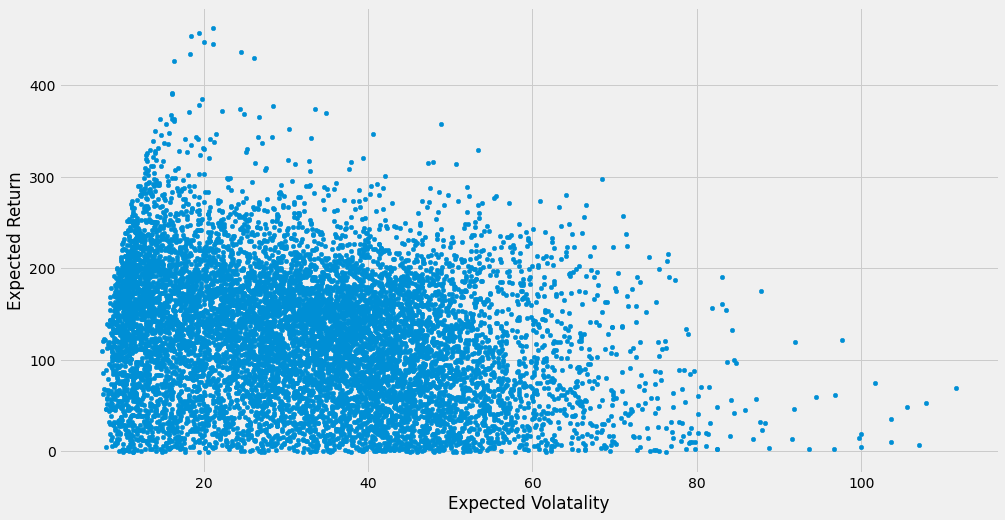

In [22]:
portfolio.plot(x='Volatility',y='Return',kind='scatter',figsize=(15,8))
plt.xlabel('Expected Volatality')
plt.ylabel('Expected Return')